In [1]:
# heckscher ohlin model. Derive autarky prices, wage, and rental. Also plot the Lerner Diagram. 

In [13]:
import sympy
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve, diff
import plotly.graph_objects as go
import plotly.express as px
from ipywidgets import interact
from sympy import init_printing

In [19]:
#sympy.interactive.init_printing(fontsize="100pt")
init_printing(scale=100)

def large_latex(expr, **settings): 
    return "\\Huge " + sympy.latex(expr, **settings)
init_printing(latex_printer=large_latex)
symbols('x')

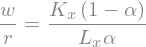

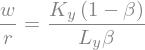

In [20]:
Qx, Qy, U, K, L, Kx, Ky, Lx, Ly, w, r, a, b, d, I, U, Cx, Cy, Px, Py = symbols(r'Q_x Q_y U K L K_x K_y L_x L_y w r \alpha \beta \delta I U C_x C_y P_x P_y')
qx_eq = Eq(Qx, Kx**(a) * Lx**(1-a))
qy_eq = Eq(Qy, Ky**(b) * Ly**(1-b))
qx_contraint = sympy.simplify(Eq(w/r, diff(qx_eq.rhs, Lx)/diff(qx_eq.rhs, Kx)))
qy_contraint = sympy.simplify(Eq(w/r, diff(qy_eq.rhs, Ly)/diff(qy_eq.rhs, Ky)))
display(qx_eq)
display(qy_eq)
display(qx_contraint)
display(qy_contraint)

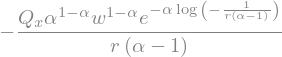

In [21]:
# solve a system of equations using qx_constraint and qx_eq to solve for Kx and Lx in terms of w and r
Kx_eq, Lx_eq = solve((qx_contraint, qx_eq), (Kx, Lx))[0]
Ky_eq, Ly_eq = solve((qy_contraint, qy_eq), (Ky, Ly))[0]
display(Kx_eq)

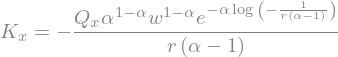

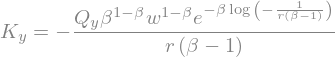

In [22]:
Kx_eq = Eq(Kx, sympy.simplify(Kx_eq))
Lx_eq = Eq(Lx, sympy.simplify(Lx_eq))
Ky_eq = Eq(Ky, sympy.simplify(Ky_eq))
Ly_eq = Eq(Ly, sympy.simplify(Ly_eq))
display(Kx_eq)
display(Lx_eq)
display(Ky_eq)
display(Ly_eq)


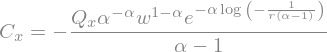

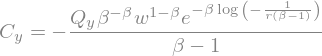

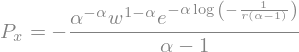

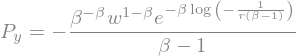

In [23]:
cx_eq = Eq(Cx, sympy.simplify(w*Lx_eq.rhs + r*Kx_eq.rhs))
cy_eq = Eq(Cy, sympy.simplify(w*Ly_eq.rhs + r*Ky_eq.rhs))
display(cx_eq)
display(cy_eq)
Px_eq = Eq(Px, cx_eq.rhs/Qx)
Py_eq = Eq(Py, cy_eq.rhs/Qy)
display(Px_eq)
display(Py_eq)

In [24]:
l_eq = Eq(L, Lx + Ly)
k_eq = Eq(K, Kx + Ky)
display(l_eq)
display(k_eq)

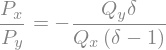

In [25]:
u_eq = Eq(U, Qx**(d) * Qy**(1-d))
display(u_eq)
i_consume_eq = Eq(I, Px * Qx + Py * Qy)
i_earn_eq = Eq(I, r * K + w * L)
i_eq = Eq(i_consume_eq.rhs, i_earn_eq.rhs)
u_constraint = sympy.simplify(Eq(Px / Py, diff(u_eq.rhs, Qx) / diff(u_eq.rhs, Qy)))
display(i_eq)
display(u_constraint)

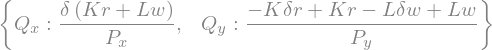

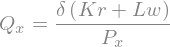

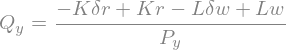

In [26]:
res = solve((u_constraint, i_eq), (Qx, Qy))
c_qx_eq = res[Qx]
c_qy_eq = res[Qy]
display(res)
c_qx_eq = sympy.simplify(Eq(Qx, c_qx_eq))
c_qy_eq = sympy.simplify(Eq(Qy, c_qy_eq))
display(c_qx_eq)
display(c_qy_eq)

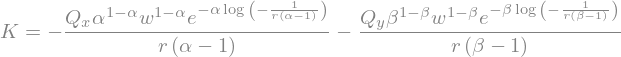

In [27]:
# substitute Kx, Lx, Ky, Ly into l_eq and k_eq
l_eq = l_eq.subs([(Lx, Lx_eq.rhs), (Ly, Ly_eq.rhs)])
k_eq = k_eq.subs([(Kx, Kx_eq.rhs), (Ky, Ky_eq.rhs)])
display(l_eq)
display(k_eq)

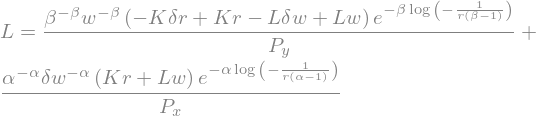

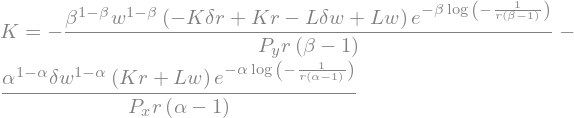

In [28]:
# substitute c_qx_eq and c_qy_eq into l_eq and k_eq
l_eq = l_eq.subs([(Qx, c_qx_eq.rhs), (Qy, c_qy_eq.rhs)])
k_eq = k_eq.subs([(Qx, c_qx_eq.rhs), (Qy, c_qy_eq.rhs)])
display(l_eq)
display(k_eq)

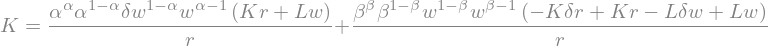

In [29]:
# substitute Px_eq and Py_eq into l_eq and k_eq
l_eq = l_eq.subs([(Px, Px_eq.rhs), (Py, Py_eq.rhs)])
k_eq = k_eq.subs([(Px, Px_eq.rhs), (Py, Py_eq.rhs)])
display(l_eq)
display(k_eq)

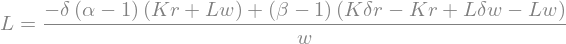

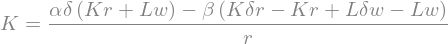

In [30]:
l_eq_s = sympy.simplify(l_eq)
k_eq_s = sympy.simplify(k_eq)
display(l_eq_s)
display(k_eq_s)

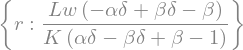

In [31]:
# solve for r and w
w1 = Eq(w, 1)  # return to factors of production is relative to wage.
r_w_s = solve((l_eq_s, k_eq_s, w1), r)
r_w_s = sympy.simplify(r_w_s)
display(r_w_s)

In [32]:
r_w_s_func = sympy.lambdify((w, L, K, a, b, d), r_w_s[r], 'numpy')

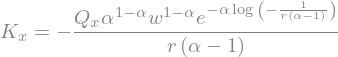

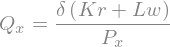

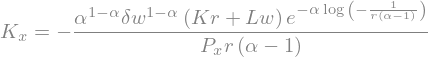

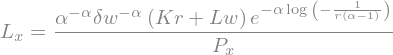

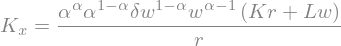

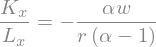

In [33]:
# simplify Kx and Lx 
display(Kx_eq)
display(Lx_eq)
display(c_qx_eq)
Kx_eq_qx = Kx_eq.subs(Qx, c_qx_eq.rhs)
Lx_eq_qx = Lx_eq.subs(Qx, c_qx_eq.rhs)
display(Kx_eq_qx)
display(Lx_eq_qx)
Kx_eq_qx_px = Kx_eq_qx.subs(Px, Px_eq.rhs)
Lx_eq_qx_px = Lx_eq_qx.subs(Px, Px_eq.rhs)
display(Kx_eq_qx_px)
display(Lx_eq_qx_px)
k_l_x = Eq(Kx/Lx, sympy.simplify(Kx_eq_qx_px.rhs/Lx_eq_qx_px.rhs))
display(k_l_x)

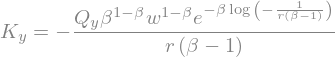

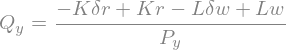

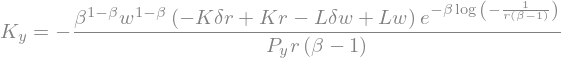

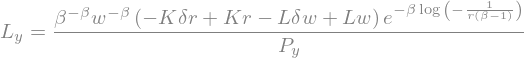

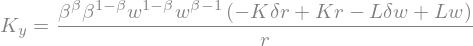

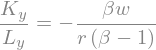

In [34]:
# simplify Ky and Ly
display(Ky_eq)
display(Ly_eq)
display(c_qy_eq)
Ky_eq_qy = Ky_eq.subs(Qy, c_qy_eq.rhs)
Ly_eq_qy = Ly_eq.subs(Qy, c_qy_eq.rhs)
display(Ky_eq_qy)
display(Ly_eq_qy)
Ky_eq_qy_py = Ky_eq_qy.subs(Py, Py_eq.rhs)
Ly_eq_qy_py = Ly_eq_qy.subs(Py, Py_eq.rhs)
display(Ky_eq_qy_py)
display(Ly_eq_qy_py)
k_l_y = Eq(Ky/Ly, sympy.simplify(Ky_eq_qy_py.rhs/Ly_eq_qy_py.rhs))
display(k_l_y)

In [35]:
# lambdify the (K/L)y and (K/L)x functions
k_l_x_func = sympy.lambdify((w, r, a), k_l_x.rhs, 'numpy')
k_l_y_func = sympy.lambdify((w, r, b), k_l_y.rhs, 'numpy')

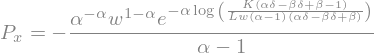

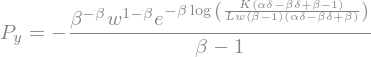

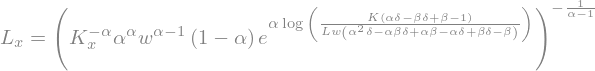

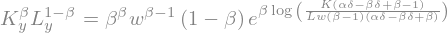

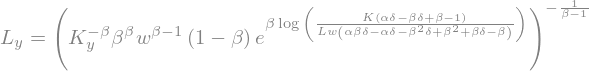

In [36]:
# solve for Qx(Lx, Kx) = 1/Px and Qy(Ly, Ky) = 1/Py
# simplify Px Py equations 
Px_eq_sim = sympy.simplify(Px_eq.subs([(r, r_w_s[r])]))
display(Px_eq_sim)
Py_eq_sim = sympy.simplify(Py_eq.subs([(r, r_w_s[r])]))
display(Py_eq_sim)
display(qx_eq)
display(qy_eq)

qx_eq_iso_px = sympy.simplify(qx_eq.subs(Qx, 1/Px_eq_sim.rhs))
display(qx_eq_iso_px)
qx_eq_iso_px_lx = solve((qx_eq_iso_px), Lx)[0]
display(Eq(Lx, qx_eq_iso_px_lx))

qy_eq_iso_py = sympy.simplify(qy_eq.subs(Qy, 1/Py_eq_sim.rhs))
display(qy_eq_iso_py)
qy_eq_iso_py_ly = solve((qy_eq_iso_py), Ly)[0]
display(Eq(Ly, qy_eq_iso_py_ly))

In [38]:
# lambdify isocost production contours 
qx_eq_iso_px_lx_func = sympy.lambdify((w, r, L, K, Kx, a, b, d), qx_eq_iso_px_lx)
qy_eq_iso_py_ly_func = sympy.lambdify((w, r, L, K, Ky, a, b, d), qy_eq_iso_py_ly)

In [39]:
def plot_wage_rental_aux(r_value, w_value):
    x_w = np.linspace(0, 1/w_value, 10)
    y_r_f = lambda x: -1 * w_value / r_value * x + 1 / r_value
    y_r = y_r_f(x_w)
    return x_w, y_r    

def plot_wage_rental(ax, r_value, w_value): 
    x_w, y_r = plot_wage_rental_aux(r_value, w_value)
    ax.plot(x_w, y_r)

In [58]:
def plot_cone_aux(w_value, k_l_x_v, k_l_y_v):
    x_l = np.linspace(0, 1/w_value, 10)
    y_l = np.linspace(0, 1/w_value, 10)
    x_k = x_l * k_l_x_v
    y_k = y_l * k_l_y_v
    return x_l, y_l, x_k, y_k

def plot_cone(ax, w_value, k_l_x_v, k_l_y_v): 
    x_l, y_l, x_k, y_k = plot_cone_aux(w_value, k_l_x_v, k_l_y_v)
    ax.plot(x_l, x_k)
    ax.plot(y_l, y_k)

In [67]:
def plot_isocost_aux(r_value, w_value, L_v, K_v, alpha_v, beta_v, delta_v):
    y_k = np.linspace(0.01, 2/r_value, 100)
    y_l = qy_eq_iso_py_ly_func(w_value, r_value, L_v, K_v, y_k, alpha_v, beta_v, delta_v)
    x_k = np.linspace(0.01, 2/r_value, 100)
    x_l = qx_eq_iso_px_lx_func(w_value, r_value, L_v, K_v, x_k, alpha_v, beta_v, delta_v)
    return x_l, x_k, y_l, y_k

def plot_isocost(ax, r_value, w_value, L_v, K_v, alpha_v, beta_v, delta_v): 
    x_l, x_k, y_l, y_k = plot_isocost_aux(r_value, w_value, L_v, K_v, alpha_v, beta_v, delta_v)
    ax.plot(y_l, y_k)
    ax.plot(x_l, x_k)

In [68]:
def plot_all(): 
    # find the rental and wage values
    w_value = 1
    r_value = r_w_s_func(w_value, L_v, K_v, alpha_v, beta_v, delta_v)
    # find the cone K/L ratios 
    k_l_x_v = k_l_x_func(w_value, r_value, alpha_v)
    k_l_y_v = k_l_y_func(w_value, r_value, beta_v)
    # generate 10 values between 0 and 1/w_value
    fig, ax = plt.subplots()
    # y labels start from 0
    ax.set_ylim(0, 2)
    # x labels start from 0
    ax.set_xlim(0, 2)
    plot_wage_rental(ax, r_value, w_value)
    plot_cone(ax, w_value, k_l_x_v, k_l_y_v)
    plot_isocost(ax, r_value, w_value, L_v, K_v, alpha_v, beta_v, delta_v)
    fig.show()

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 20.5 μs


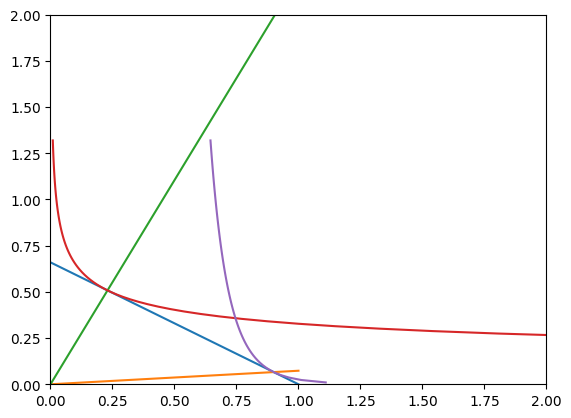

In [69]:
%time
alpha_v = 0.10
beta_v = 0.77
delta_v = 0.25
L_v = 100
K_v = 100
plot_all()

In [26]:
from tqdm import tqdm

In [55]:
# # generate a plotly plot equivalent of the above matplotlib except with sliders for alpha_v, beta_v, delta_v, L_v, K_v
# fig = go.FigureWidget()

A_STEP=0.25
B_STEP=0.25
D_STEP=0.25
K_STEP=60
L_STEP=60

del fig
# Create figure
fig = go.Figure()

total_iterations = len(np.arange(0.05, 0.95, A_STEP)) * \
                   len(np.arange(0.05, 0.95, B_STEP)) * \
                   len(np.arange(0.05, 0.95, D_STEP)) * \
                   len(np.arange(1, 205, K_STEP)) * \
                   len(np.arange(1, 205, L_STEP))

#with tqdm(total=total_iterations, desc="Processing") as pbar:
for a_step in np.arange(0.05, 0.95, A_STEP):
    print(a_step)
    for b_step in np.arange(0.05, 0.95, B_STEP):
        for d_step in np.arange(0.05, 0.95, D_STEP):
            for k_step in np.arange(1, 205, K_STEP):
                for l_step in np.arange(1, 205, L_STEP):
                    #pbar.update(1) 
                    w_value_step = 1
                    r_value_step = r_w_s_func(w_value_step, l_step, k_step, a_step, b_step, d_step)
                    k_l_x_v_step = k_l_x_func(w_value_step, r_value_step, a_step)
                    k_l_y_v_step = k_l_y_func(w_value_step, r_value_step, b_step)
                    x_l_cone, y_l_cone, x_k_cone, y_k_cone = plot_cone_aux(w_value_step, k_l_x_v_step, k_l_y_v_step)
                    x_l_iso, x_k_iso, y_l_iso, y_k_iso = plot_isocost_aux(r_value_step, l_step, k_step, a_step, b_step, d_step)
                    x_w_step, y_r_step = plot_wage_rental_aux(r_value_step, w_value_step)
                    orange_color = "#FF8D29"
                    blue_color = "#00CED1"
                    purple_color = "#800080"
                    green_color = "#008000"
                    black_color = "#000000"
                    # wage rental line
                    fig.add_trace(
                        go.Scatter(
                            visible=False,
                            line=dict(color=orange_color),  # width=6
                            #name=r"\delta = " + str(d_step),
                            x=x_w_step,
                            y=y_r_step))
                    # (K/L)x cone line
                    fig.add_trace(
                        go.Scatter(
                            visible=False,
                            line=dict(color=blue_color),  # width=6
                            #name=r"\delta = " + str(d_step),
                            x=x_l_cone,
                            y=x_k_cone))
                    # (K/L)y cone line
                    fig.add_trace(
                        go.Scatter(
                            visible=False,
                            line=dict(color=purple_color),  # width=6
                            #name=r"\delta = " + str(d_step),
                            x=y_l_cone,
                            y=y_k_cone))
                    # add x iso cost line
                    fig.add_trace(
                        go.Scatter(
                            visible=False,
                            line=dict(color=green_color),  # width=6
                            #name=r"\delta = " + str(d_step),
                            x=x_l_iso,
                            y=x_k_iso))
                    # add y iso cost line
                    fig.add_trace(
                        go.Scatter(
                            visible=False,
                            line=dict(color=black_color),  # width=6
                            #name=r"\delta = " + str(d_step),
                            x=y_l_iso,
                            y=y_k_iso))

In [65]:
print(len(fig.data))

In [60]:
for i in range(1000, 1100): 
    fig.data[i].visible = True
# set x labels from 0 to 3
fig.update_xaxes(range=[0, 3])
# set y labels from 0 to 3
# equalize height and width of plot
fig.update_layout(
    autosize=False,
    width=500,
    height=500,
    margin=dict(l=50, r=50, b=100, t=100, pad=4),
    paper_bgcolor="LightSteelBlue",
)
fig.update_yaxes(range=[0, 3])
fig.show()

In [61]:
fig.update_layout(
    autosize=False,
    width=1500,
    height=1500,
    margin=dict(l=50, r=50, b=100, t=100, pad=4),
    paper_bgcolor="LightSteelBlue",
)
fig.update_yaxes(range=[0, 3])
fig.show()

In [28]:
# # Create and add slider
# steps = []
# for i in range(len(fig.data)):
#     step = dict(
#         method="update",
#         args=[{"visible": [False] * len(fig.data)},
#               {"title": "Slider switched to step: " + str(i)}],  # layout attribute
#     )
#     step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
#     steps.append(step)

# fig.data[5].visible = True
# fig.show()